# HW1: Data exploration and Dimensionality reduction

In this assignment you will explore the dataset, handle the missing values, standardize the numerical values and reduce the dimensionality of the feature space. The learning outcome of this part is to know how one can pre-process a real-world dataset and prepare for an supervised or unsupervised learning task.

### Student information
Please provide your information for automatic grading.

In [1]:
STUD_SUID = 'acja2253'
STUD_NAME = 'Achyut Jagini'
STUD_EMAIL = 'acja2253@student.su.se'

##  Grading: 

Total points: 4

## OUTLINE: 

Data pre-processing, plotting and dimensionality reduction

1. Reading the file, points: 0.1
2. Missing Values, points: 0.2
3. Impute with scikit-learn, points: 0.2
4. Implement imputation, points: 0.7
5. Plotting, total points: 0.5
    - task a, points: 0.3 
    - task b, points: 0.2
6. Standardization, points: 0.3
7. Dimensionality reduction, total points: 0.5
    - task a, points: 0.3
    - task b , points: 0.2
8. Multi-Dimensional Scaling, total points: 1.5
    - task a, points: 0.7
    - task b, points: 0.8

## `NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code.  You should not delete any of the given cells or change the strucure of the cells or add cells (unless completely necessary, add a comment on why you added a cell) as they will help us grade the assignment. Some variable names are already given and we have assigned random values or empty arrays on them. In this case you should only change the assignments on the variables but keep the names as given. When you are finished with implementing all the tasks, clear all outputs, run all cells again (make sure there is no error) and submit! Make sure that the results and figures asked are visible for us to grade. ` 


In [2]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from matplotlib.colors import ListedColormap


RSEED = 8


## DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

We will use **Pima Indians Diabetes Database** that is publicly available and from UCI. However, we removed and changed some parts of the dataset for the homework evaluation, so **please use the one in the zip file provided in ilearn**.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on specific diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

According to the information on the data, it has eight attributes and one binary class. The brief explanation of the attributes are as follows:

- Pregnancies: Number of times pregnant.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure: Diastolic blood pressure (mm Hg).

- SkinThickness: Triceps skin fold thickness (mm).

- Insulin: 2-Hour serum insulin (mu U/ml).

- BMI: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction: Diabetes pedigree function.

- Age: Age (years).

- and we have a binary class which can be 0 (healthy) or 1 (diabetes).

## *1.* Reading the file

### `Task: Read the dataset using pandas. Use the csv file called diabetes.csv that you will find on ilearn.`

In [3]:
# Write your code here
# call your dataset: data

data = pd.read_csv('datasets/diabetes.csv')

In [4]:
# do not delete this!
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# if you want to see information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# if you want to see information about the dataset, uncomment:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *2.* Missing values

### It seems like there is no null data. However, if you check zero values in the dataset, there are so many of them. 

### `Task: Plot a bar plot of the missing values (zero values) per attribute, excluding the attributes 'Pregnancies', 'Outcome'. The plot must have a title and the bars of the plot must be named to their respective attribute names.` 



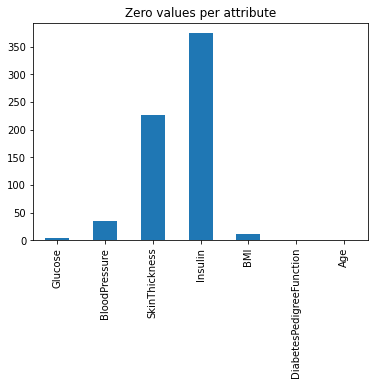

In [7]:
# the steps are just indicative, if you want to do it your own way, please do so as long as you print the required barplot, specified above 
# in the task description. 
# The style, color, or library used for plotting will not affect the grading of the task (or any of the tasks that require plots)


# step 1: store the sum of missing values (the zero values) per attribure (excluding the attributes 'Pregnancies', 'Outcome') in a pandas Series
# step 2: plot the missing values series as a barplot, using the plot function from pandas. 

# Write your code here
d = {}
for i in data.columns:
    if i=="Pregnancies" or i=="Outcome":
        continue
    else:
        d[i]=(data[i]==0).sum()


s=pd.Series(d)
plot = s.plot(kind='bar', title="Zero values per attribute")

## *3.* Impute with scikit-learn

### Is it normal that people's BMI is zero? or not? What about Glucose, and Blood Pressure? You may want to change the zero values into another reasonable value, such as mean or median. The only thing that can have zero value is the attribute **'Pregnancies'**. 

### **NOTE**! The attribute **'Outcome'** is your class. The class SHOULD NOT be included the cleaning process.

### `Task: Impute the missing values using the SimpleImputer from scikit-learn with strategy = 'mean'. Return a pandas dataframe called 'data_imputed' that includes both the imputed attributes and the ones that you did not impute (Pregnancies, Outcome). The dataframe called 'data' SHOULD REMAIN UNCHANGED (not imputed) as it will be used again in the next task.`
### For the scikit-learn imputation, you can find more information [here](https://scikit-learn.org/stable/modules/impute.html).


In [8]:
# Scickit-learn version
# The steps are just indicative, if you want to do it your own way, please do so as long you store in data_imputed a dataset that includes 
# both the imputed attributes and the ones that you did not impute (Pregnancies, Outcome). The dataframe 'data' must remain unchanged (not imputed). 
  
# step 1: create a copy of the original dataset called data_imputed
# step 2: create a list with the names of the attributes that you will impute, call it columns
# step 3: create a new dataset called df_part, that includes only the columns that you will impute (the ones from step 2)
# step 4: Change the zero values in the columns to np.nan

# step 5: define the SimpleImputer object (from sklearn) with strategy='mean' and call it imputer, fit and transform the dataset that you created in step 3 
# step 6: convert the resulting array from step 5 into a dataframe, as column names you can pass the names of attributes of the list that you created in step 2. call it df_converted
# step 7: in data_imputed (which is still a copy of data (the original dataset) replace the attributes you wanted to impute with the attribures in df_converted. The dataframe called 'data' should remain 
# unchanged. 
# data_imputed should contain all 8 attributes and the class, where every attribute -except 'Pregnancies' and 'Outcome'- have imputed values 
 
# Write your code here

data_imputed=data.copy()
columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

df_part=data_imputed[columns]
df_part = df_part.replace(0, np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(df_part)
data_imput = imputer.transform(df_part)

df_converted = pd.DataFrame(data_imput,columns=columns)

for i in columns:
    data_imputed[i]=df_converted[i]


In [9]:
# if you successfuly finished the imputation for task3, uncomment the following:
imputer.statistics_


array([121.68676278,  72.40518417,  29.15341959, 155.54822335,
        32.45746367,   0.4718763 ,  33.24088542])

In [12]:
# if you successfuly finished the imputation for task3, uncomment the following:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# if you successfuly finished the imputation for task3, uncomment the following:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *4.* Implement imputation:

### `Task: Write a function that changes the zero (or nan) value to the mean of the attribute of a dataframe. `

### You will impute the missing values with the mean of the column without using scikit-learn. You will store the resulting dataset in diabetes_1, that includes both the imputed attributes and the ones that you did not impute (Pregnancies, Outcome). diabetes_1 will not be used again after this task. 

In [14]:
def imputation(df, columns_to_imputed):
    """
     A function to change nan value (or zero value) to the mean of the attribute
        
        # the steps are just indicative, implement it the way you like as long as you return a dataframe 
        # that includes both the imputed attributes and the ones that you did not impute. 

        - Step 1: Get a part of dataframe using columns received as a parameter.
        - Step 2: Change the zero values in the columns to np.nan
        - Step 3: Change the nan values to the mean of each attribute (column). 
                  You can use the apply(), fillna() functions.
        
        Input:
          df: A dataframe to apply imputation
          columns_to_imputed: A list of columns that need to be imputed
          
        Output:
          An imputed dataframe
    
    """

    #Write your code here
    sub_df = df[columns_to_imputed].copy()
    sub_df.replace(0, np.nan, inplace=True)
    sub_df = sub_df.apply(lambda col: col.fillna(col.mean()))
    df[columns_to_imputed] = sub_df
    
    return df #change this None to the df to be returned

In [15]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
diabetes_1 = imputation(data, columns)

In [16]:
# if you successfuly finished the imputation, uncomment this

try:
    np.testing.assert_allclose(data_imputed.values, diabetes_1.values)
    print("result: equal")
except:
    print("result: not equal")


result: equal


In [17]:
# uncomment this
diabetes_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# uncomment this
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *5.* Plotting

### a. In this task we will explore the attribute 'Glucose' with plotting. 

### `Task: Create 1 figure with a set of 3 subplots. `


#### - `In the 1st subplot create a boxplot for the attribute Glucose.`


#### - `In the 2nd subplot create a histogram for the attribute Glucose.`


#### - `In the 3rd subplot create a scatterplot for the attributes Glucose and BloodPressure, colored by the attribute 'Outcome'(add a legend to identify color - class label pairs).`
`The plots should have titles, the figsize should be big enough (for example figsize=(16,9)). If you cannot create any of the required plots either remove the respective axis and make for example  1 figure with 2 subplots or create the figure with three subplots and leave the respective axis empty.'`

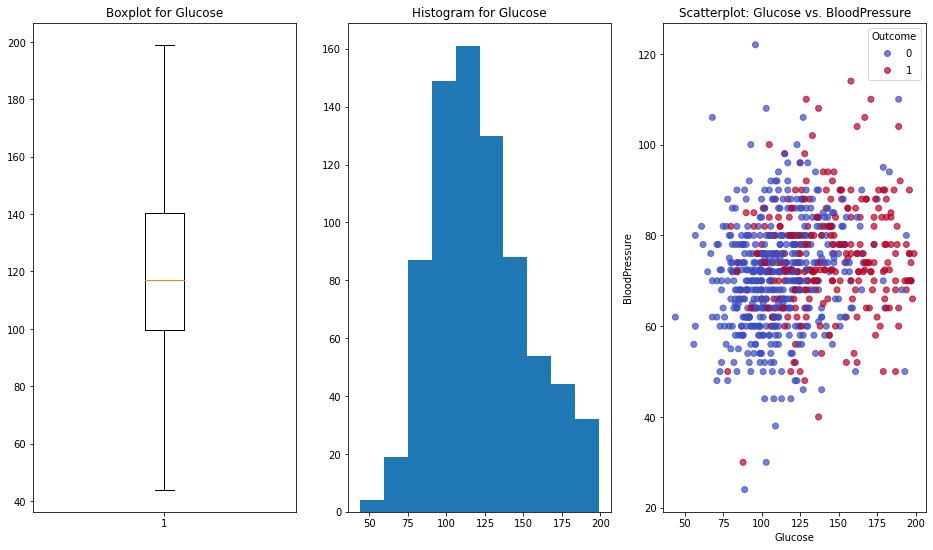

In [19]:
# Create 1 figure with a set of 3 subplots. Each axes should contain a figure as described below: 
# Figure 1: A boxplot for the attribure 'Glucose'
# Figure 2: A histogram for the attribure 'Glucose'
# Figure 3: A scatterplot of Glucose vs BloodPressure, colored by the attribure 'Outcome', include a legend to identify which class-color pairs

# All subplots must have a title


fig, ax = plt.subplots(1, 3, figsize=(16,9)) #create 1 row with 3 plots
#Write your code here
ax[0].boxplot(data_imputed['Glucose'])
ax[0].set_title("Boxplot for Glucose")

ax[1].hist(data_imputed['Glucose'])
ax[1].set_title("Histogram for Glucose")


scatter=ax[2].scatter(
    data_imputed['Glucose'],
    data_imputed['BloodPressure'],
    c=data_imputed['Outcome'],
    cmap='coolwarm',
    alpha=0.7,
    label=['Negative', 'Positive']  
)
ax[2].set_title('Scatterplot: Glucose vs. BloodPressure')
ax[2].set_xlabel('Glucose')
ax[2].set_ylabel('BloodPressure')


legend = ax[2].legend(*scatter.legend_elements(), title='Outcome')



## b.	Age by class 

### `Task:  Plot the 'Age' attribute in groups of 10 years in relation to the class ('Outcome').`

Information about the cut function [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

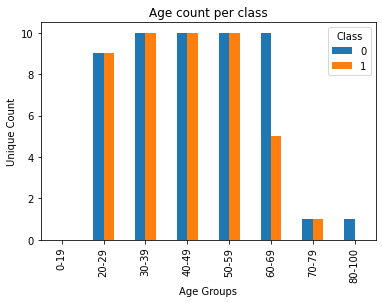

In [20]:
# step 1: Divide the age column into the following age groups: 0-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-100 using the cut function from pandas. 
# The new column should be called age_bins.
# step 2: Store in age_by_class, a dataframe with the counts of unique values of the attribute age_bins by class. You can use groupby() and value_counts()
# step 2: Plot a barplot for the age_by_class. You can use pandas to plot it.
# step 3: **DROP THE age_bins** attribute from data_imputed after you have plotted the barchart. 
# do not skip dropping the age_bins!

# Write your code here

data_imputed['age_bins']=pd.cut(data_imputed["Age"],bins=[0, 19, 29, 39, 49, 59, 69, 79, 100],labels=['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-100'])

age_by_class = data_imputed.groupby(['age_bins', 'Outcome'])['Age'].nunique().unstack(fill_value=0)
plot = age_by_class.plot(kind='bar', title="Age count per class")

plt.legend(title='Class')
plt.xlabel('Age Groups')
plt.ylabel('Unique Count')

data_imputed.drop(columns=['age_bins'], inplace=True)


In [21]:
# do not delete this
data_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


## *6.* Standardization

### Standardization transforms data to have a mean of zero and a standard deviation of 1. 

### It is a crucial step before performing PCA, since we are interested in the components that maximize the variance. 





### `Task: Standardize the data_imputed dataset. You can use sklearn.  Store in a variable called 'y' the attribute 'Outcome' (your class)`
### NOTE! Outcome is the class of the dataset indicating if a patient is healthy or has diabetes. As we discussed in the lab, the class should not be included in the standardization. 

In [22]:
# step 1: Use StandardScaler to fit_transform data_imputed, excluding the class (Outcome)
# step 3: Transform the standardized numpy matrix returned by StandardScaler into a dataframe called data_standardized.
# step 4: Rename the columns of the dataframe with their corresponding names.
# step 5: Store in a variable called y the attribute Outcome (your class), do not skip this

# Write your code here

#y = pd.Series() # change this
#data_standardized = pd.DataFrame() # change this


columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

X = data_imputed[columns]
scaler = StandardScaler().fit(X)

data_scaled = scaler.transform(X)
data_standardized= pd.DataFrame(data_scaled, columns=columns)
y = data_imputed['Outcome']
  


In [23]:
# do not delete this
data_standardized.mean()

Pregnancies                -6.476301e-17
Glucose                    -3.561966e-16
BloodPressure               6.915764e-16
SkinThickness               7.956598e-16
Insulin                    -3.330669e-16
BMI                         3.515706e-16
DiabetesPedigreeFunction    2.451743e-16
Age                         1.931325e-16
dtype: float64

In [24]:
# do not delete this
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## *7.* Dimensionality Reduction

## a. PCA

### `Task: Reduce the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component Analysis. Print the information obtained by the following attributes of the pca object: explained_variance_ratio and components_. `

In [25]:
# step1: Reduce the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component analysis. You can use PCA from sklearn. Use random state = 8
# step2: Store the explained variance ratio in an array called explained_variance_ratio.
# step3: Store in a dataframe called df_principal_components, the result of pca's attribute components_,
# (Principal axes in feature space, representing the directions of maximum variance in the data), with the respective attribute names.

# Write your code here


pca = PCA(n_components=2,random_state=8)
x_pca = pca.fit_transform(data_standardized)
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
explained_variance_ratio =  pca.explained_variance_ratio_
df_principal_components = pd.DataFrame(pca.components_,columns=columns)


In [26]:
df_principal_components

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.308371,0.421065,0.378498,0.390485,0.320583,0.390827,0.146564,0.393539
1,-0.552069,0.068170,-0.139202,0.347245,0.152909,0.437935,0.271494,-0.511603


In [27]:
explained_variance_ratio

array([0.28750131, 0.18411087])

## b. 	Which attribute contributes the most?

### `Task: Store in a variable called attribure_contributing_the_most, which attribure contributes most to the variance of the 1st PC.`

In [28]:
# Which attribute contributes the most in the variance of the 1st principal component? 
# store the name of the attribute here, as a string type:

absolute_pc1 = abs(df_principal_components.iloc[0])
attribute_contributing_the_most = absolute_pc1.idxmax()

In [29]:
# do not delete this
attribute_contributing_the_most

'Glucose'

## 8.  Multi-Dimensional Scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data and it can help visualize the distances or dissimilarities between sets of objects. Examples of similarity or dissimilarity data might include the distance between pairs of cities, or planets at a particular point in time, or the similarity among groups of people (voters, patients etc). 

In these last two excercises we will apply Multi-Dimensional Scaling in our patient dataset using two different versions of the MDS sklearn algorithm. 

We will focus on the attribute **dissimilarity** of the MDS object. The attribute can be either 'euclidean' or 'precomputed'. In the former case the euclidean distance between the data points is computed by the algorithm, while in the latter case the user must themeselves compute the dissimilarities between data points and pass this to fit_transform.  

Please advice the sklearn page for MDS to be able to implement the above tasks: [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html). Make sure you understand the parameters of fit_transform and how you could use them for the tasks!


## a. Multi-Dimensional Scaling, task a

###   `Task: Apply MDS on the data_standardized with n_components=2 and dissimilarity='euclidean'. Plot the 2 resulting coordinates (in a scatterplot) with colors respective to the class labels.`

Note: This is very similar to how we applied sklearn's PCA on task 7!

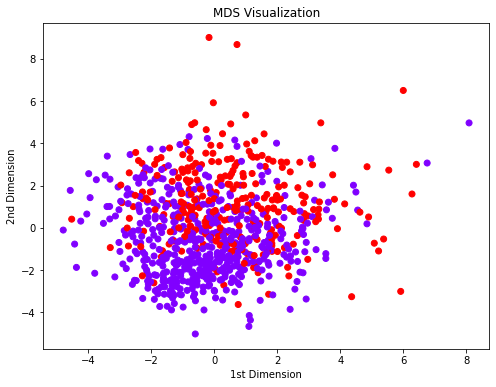

In [30]:
# step 1: Initialize MDS with n_components = 2, random_state=8.
# step 2: Fit and transform the standardized dataset
# step 3: Plot the resulting reduced dataset with colors respective to the class (Outcome).

# write your code here
mds = MDS(n_components=2,random_state=8,dissimilarity='euclidean')
data_mds = mds.fit_transform(data_standardized)


plt.figure(figsize=(8,6))
plt.scatter(x=data_mds[:,0], y=data_mds[:,1], c=data['Outcome'], cmap='rainbow')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('MDS Visualization')

X_2d_a =data_mds # change this assignment on X_2d_a, but keep X_2d_a as the name of the resulting MDS numpy array

In [31]:
X_2d_a

array([[-0.12285467,  1.79329716],
       [-0.48300902, -1.50671556],
       [-2.5678784 ,  1.00016869],
       ...,
       [-1.07935283, -0.61273767],
       [-0.85726751, -0.16667644],
       [ 0.26995829, -1.3868661 ]])

## b. Multi-Dimensional Scaling, task b

### `Task: Compute the pairwise distances between observations using the euclidean metric. Apply MDS on the custom similarity matrix with n_components=2. Plot the results with colors respective to the class label. `

Note: the resulting plot should look similar with the one of Task 8a. 

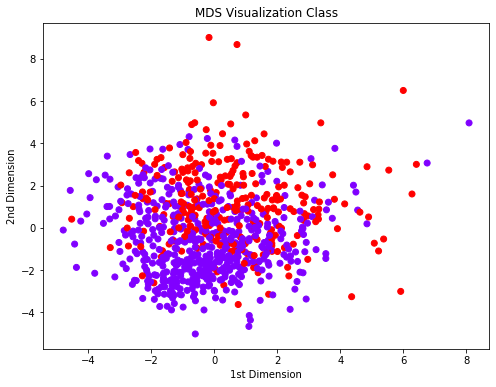

In [32]:
# step 1: compute the pairwise distances between observations using the euclidean metric. 

# One of the ways to do this is to use pdist and squareform from the scipy library (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)) 
# or euclidean_distances from sklearn. In any case the returned array should be: distances ndarray of shape (n_samples_data_standardized, n_samples_data_standardized)

# step 2: create an MDS object with n_components=2, random_state=8. What should the dissimilarity parameter be in this case?
# step 3: apply MDS on the constructed square distance matrix from step 1
# step 4: plot the results in a scatterplot with colors respective to the class label

from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import euclidean_distances

distances = euclidean_distances(data_standardized,squared=False) 

mds = MDS(n_components=2,random_state=8,dissimilarity='precomputed')

data_mds_b = mds.fit_transform(distances)

plt.figure(figsize=(8, 6))

plt.scatter(x=data_mds_b[:, 0], y=data_mds_b[:, 1], c=data['Outcome'], cmap='rainbow')

plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('MDS Visualization Class')
plt.show()


# write your code here

X_2d_b = data_mds_b # change this assignment on X_2d_b, but keep X_2d_b as the name of the resulting MDS numpy array


In [33]:
# do not delete this 
try:
    np.testing.assert_allclose(X_2d_b, X_2d_a, atol=0.00001)
    print("result: equal")
except:
    print("result: not equal")


result: equal


## `NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code.  You should not delete any of the given cells or change the structure of the cells or add cells (unless completely necessary, add a comment on why you added a cell) as they will help us grade the assignment. Some variable names are already given and we have assigned random values or empty arrays on them. In this case you should only change the assignments on the variables but keep the names as given. When you are finished with implementing all the tasks, clear all outputs, run all cells again (make sure there is no error) and submit! Make sure that the results and figures asked are visible for us to grade. ` 


# End of assignment 1